# Well Location for Oil Company

**Project Description**

A production company needs to determine where to drill a new well.

Oil samples were provided in three regions: 10,000 fields in each, where the quality of oil and the volume of its reserves were measured.

**Research Objective**

Build a machine learning model that will help determine the region where production will bring the greatest profit. Analyze the possible profit and risks using *Bootstrap.* technology.

**Research Tasks**

- Build a model and estimate the volume of oil reserves;
- Select fields with the highest estimated values. The number of fields depends on the company's budget and the cost of developing one well;
- Determine the region with the maximum total profit of the selected wells.

**Data Description**

The exploration data for the three regions is located in the files:

`/datasets/geo_data_0.csv`
`/datasets/geo_data_1.csv`
`/datasets/geo_data_2.csv`

Data Description:

- `id` is a unique well identifier;
- `f0`, `f1`, `f2` are three point attributes;
- `product` is the volume of reserves in the well (thousand barrels).

**Additional Conditions**

- Only linear regression is suitable for training the model (the rest are insufficiently predictable).
- During exploration of the region, 500 points are examined, from which the 200 best ones are selected for development using machine learning.
- The budget for well development in the region is 10 billion rubles.
- At current prices, one barrel of raw materials brings in 450 rubles of income. The income from each unit of product is 450 thousand rubles, since the volume is indicated in thousands of barrels.
- After assessing the risks, only those regions should be left in which the probability of losses is less than 2.5%. Among them, the region with the highest average profit is selected.

## Import Libraries

In [ ]:
!pip install phik -q
!pip install scikit-learn --upgrade -q

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LinearRegression

from sklearn.metrics import root_mean_squared_error, make_scorer

RANDOM_STATE = 42
TEST_SIZE = 0.25

## Loading and Preparing Data

### Loading Data

In [ ]:
try:
    data_geo_0 = pd.read_csv('/datasets/geo_data_0.csv')
except FileNotFoundError:
    data_geo_0 = pd.read_csv('https://.../datasets/geo_data_0.csv')

In [ ]:
try:
    data_geo_1 = pd.read_csv('/datasets/geo_data_1.csv')
except FileNotFoundError:
    data_geo_1 = pd.read_csv('https://.../datasets/geo_data_1.csv')

In [ ]:
try:
    data_geo_2 = pd.read_csv('/datasets/geo_data_2.csv')
except FileNotFoundError:
    data_geo_2 = pd.read_csv('https://.../datasets/geo_data_2.csv')

Let's take a look at the data:

In [ ]:
#universal function for reviewing data
def data_review(data):
    '''
    data - DataFrame

    '''
    print('*'*10, 'The Original DataFrame', '*'*10)
    display(data.head())
    print('')
    print('')
    print('*'*10, 'General Information', '*'*10)
    print('')
    data.info()
    print('')
    print('')
    print('*'*10, 'Has NaN', '*'*10)
    display(data.isna().sum())
    print('')
    print('')
    print('*'*10, 'Descriptive Statistics', '*'*10)
    display(data.describe())

In [ ]:
data_review(data_geo_0)

********** The Original DataFrame **********


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647




********** General Information **********

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


********** Has NaN **********


,0
id,0
f0,0
f1,0
f2,0
product,0




********** Descriptive Statistics **********


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [ ]:
data_review(data_geo_1)

********** The Original DataFrame **********


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305




********** General Information **********

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


********** Has NaN **********


,0
id,0
f0,0
f1,0
f2,0
product,0




********** Descriptive Statistics **********


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [ ]:
data_review(data_geo_2)

********** The Original DataFrame **********


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746




********** General Information **********

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


********** Has NaN **********


,0
id,0
f0,0
f1,0
f2,0
product,0




********** Descriptive Statistics **********


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


#### Conclusions

- column names comply with standards;
- data types correspond to column contents;
- no gaps in columns were found.

###  Data Preprocessing

Before starting preprocessing of the original dataset, let's resave it to the df_x variable and create a list of datasets:

In [ ]:
df_geo_0 = data_geo_0.copy()
df_geo_1 = data_geo_1.copy()
df_geo_2 = data_geo_2.copy()

dfs = [df_geo_0, df_geo_1, df_geo_2]
dfs_dict = {
    'df_geo_0': df_geo_0,
    'df_geo_1': df_geo_1,
    'df_geo_2': df_geo_2
}

Let's check the datasets for explicit (complete) duplicates of wells.

In [ ]:
for df in dfs:
    print(df.duplicated().sum())

0
0
0


No explicit duplicates were found.

Let's check the datasets for duplicate wells by ID.

In [ ]:
for name, df in dfs_dict.items():
    diplicated_rows = df[df.duplicated(['id'])]['id'].count()
    print('*'*10,'Name:', name, '*'*10, '\n')
    print('Number of Duplicates:', diplicated_rows, '\n')

********** Name: df_geo_0 ********** 

Number of Duplicates: 10 

********** Name: df_geo_1 ********** 

Number of Duplicates: 4 

********** Name: df_geo_2 ********** 

Number of Duplicates: 4 



Let's remove duplicate wells:

In [ ]:
for df in dfs:
    df.drop_duplicates(subset=['id'], inplace=True)

Let's check that duplicates in the `id` column have been removed:

In [ ]:
for name, df in dfs_dict.items():
    diplicated_rows = df[df.duplicated(['id'])]['id'].count()
    print('*'*10,'Name:', name, '*'*10, '\n')
    print('Number of Duplicates:', diplicated_rows, '\n')

********** Name: df_geo_0 ********** 

Number of Duplicates: 0 

********** Name: df_geo_1 ********** 

Number of Duplicates: 0 

********** Name: df_geo_2 ********** 

Number of Duplicates: 0 



#### Conclusions

- There are no explicit (complete) duplicates in the dataframes;
- Duplicates were found in the `id` column, indicating the presence of different features for the same well, which can distort the model's operation;
- Detected duplicate wells were removed.

## Exploratory Data Analysis

### Graphical feature analysis

To quickly analyze the columns, we will create our own function that will build a histogram and a box plot for each quantitative column:

In [ ]:
def num_to_scan(df, col):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

    # Histogram
    sns.histplot(df, x=col, bins=20, ax=axes[0])
    axes[0].set_title(col)

    # Boxplot
    df.boxplot(column=col, ax=axes[1])
    axes[1].set_ylabel(col)

    plt.show()

********** Name: df_geo_0 ********** 



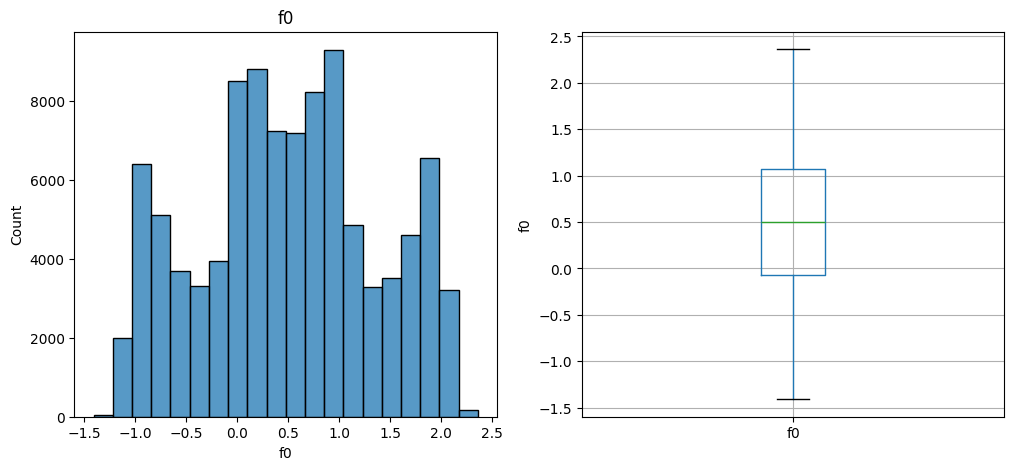

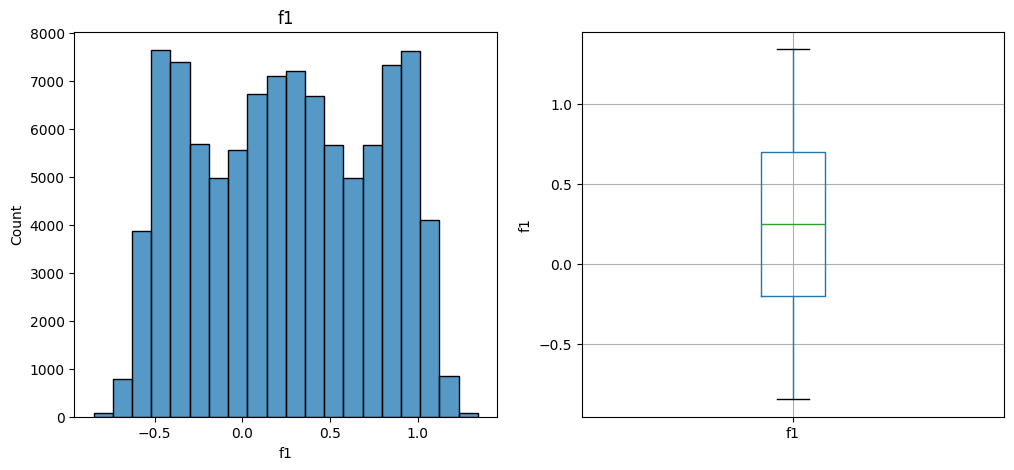

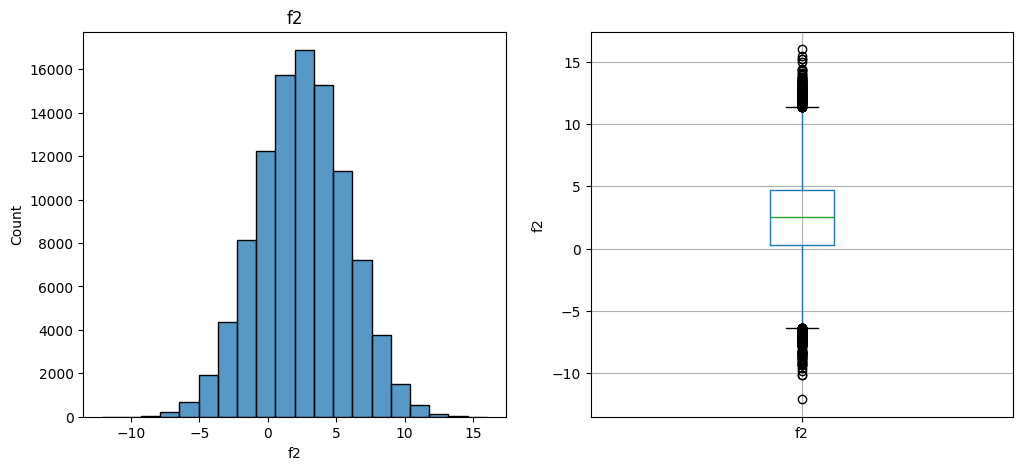

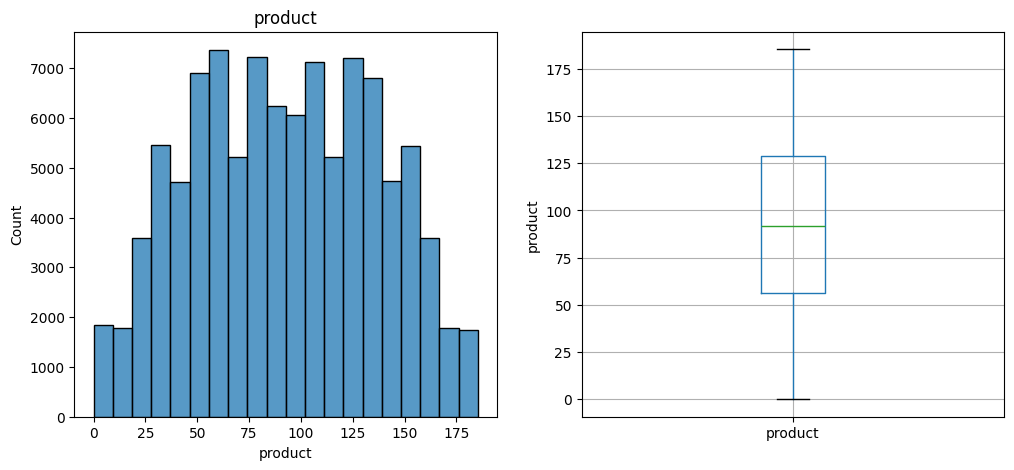

********** Name: df_geo_1 ********** 



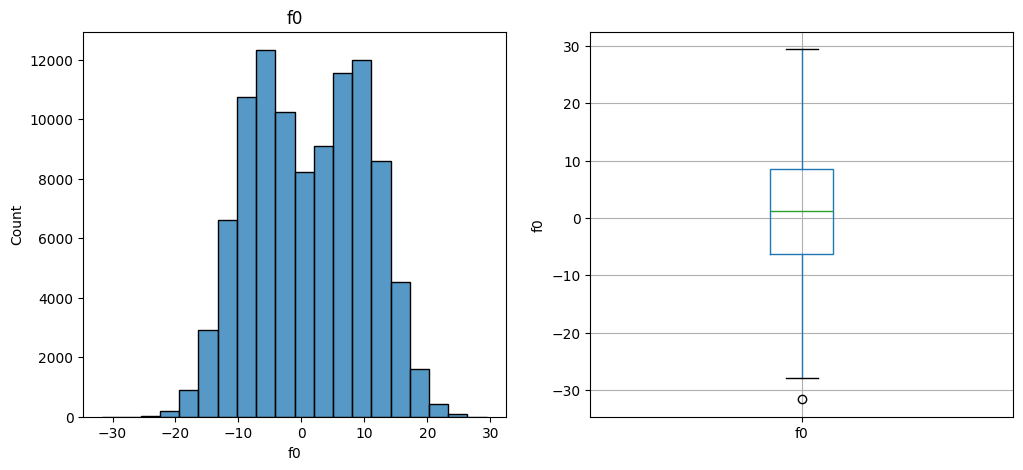

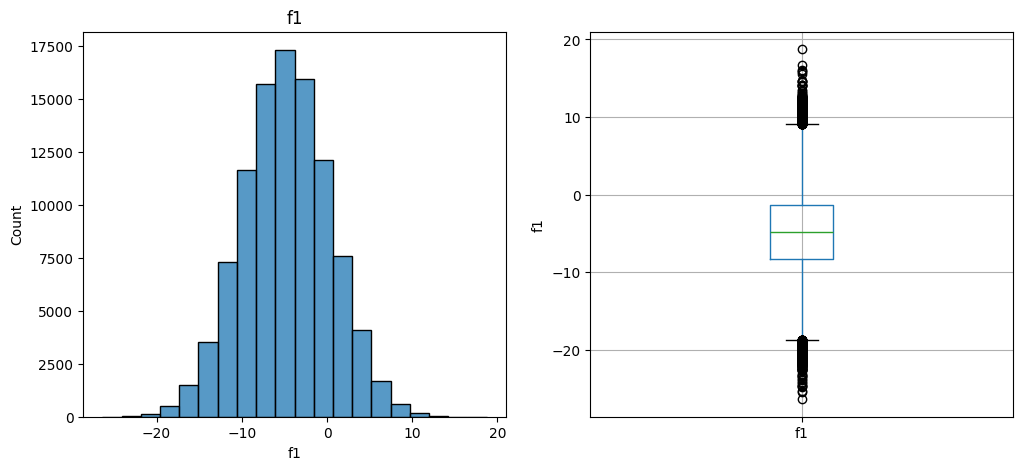

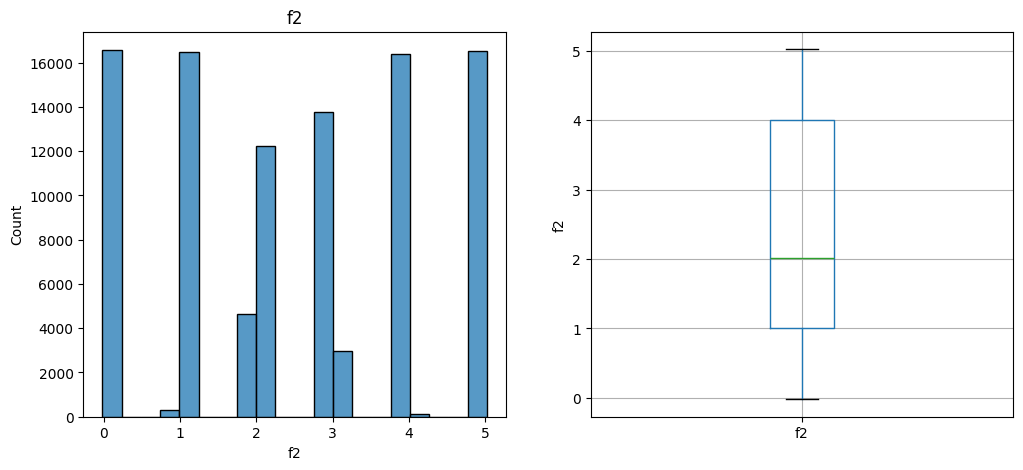

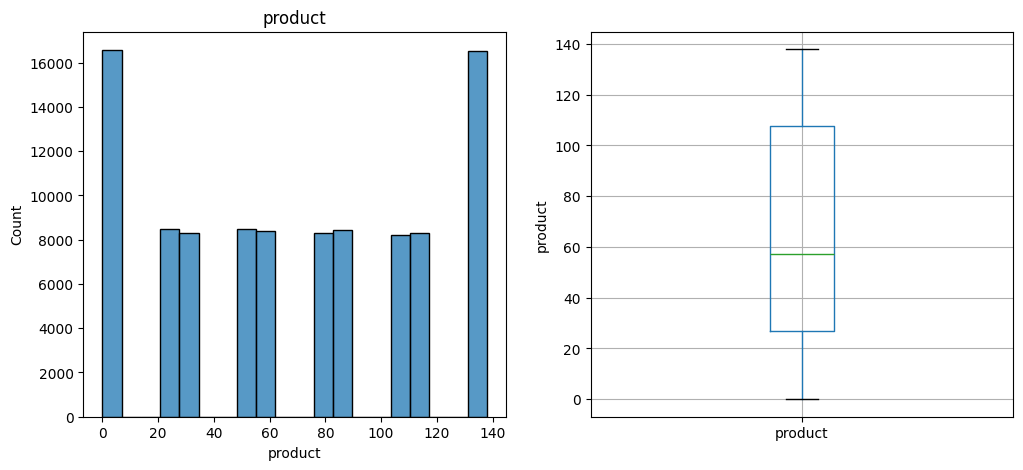

********** Name: df_geo_2 ********** 



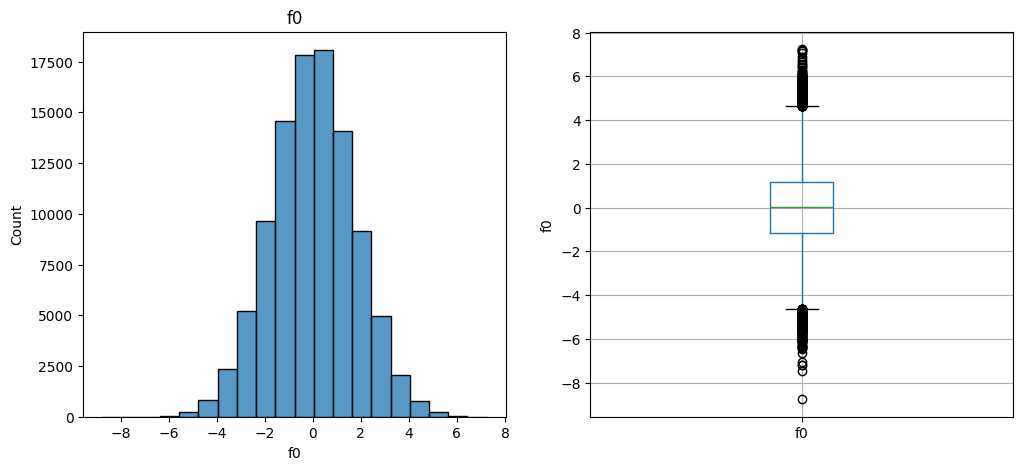

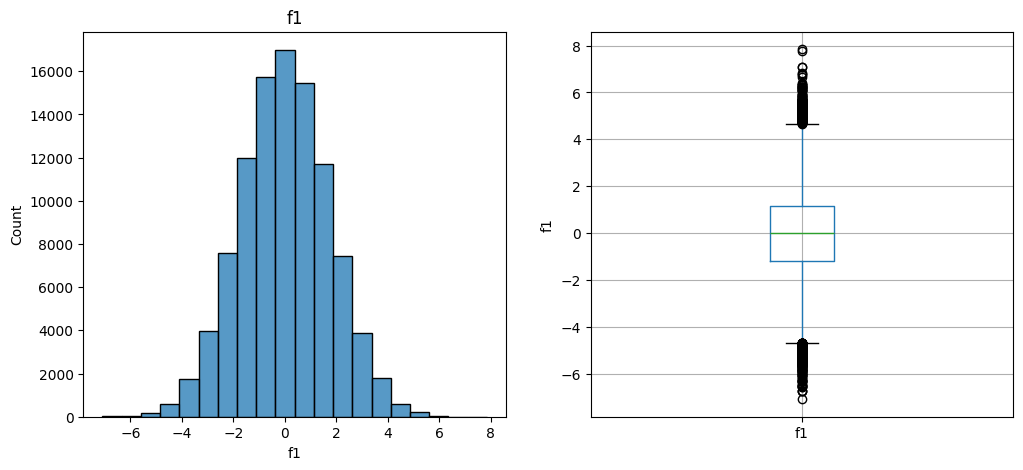

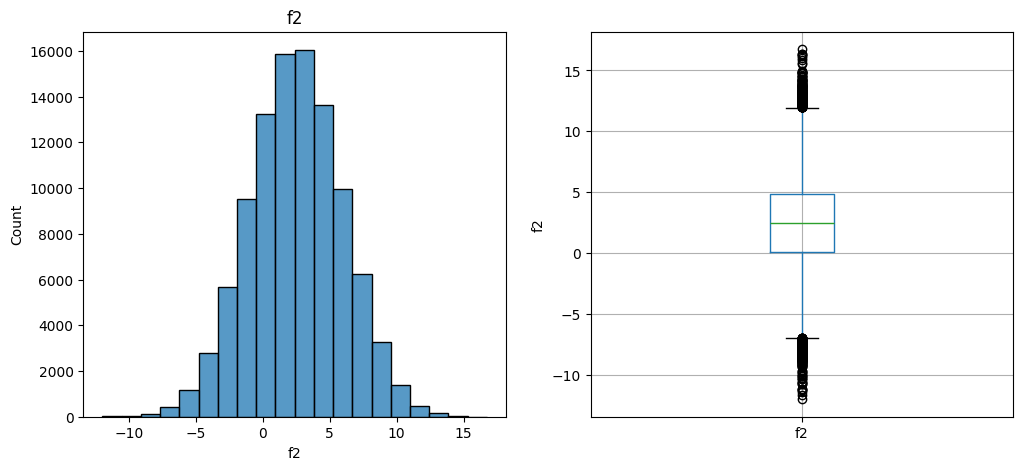

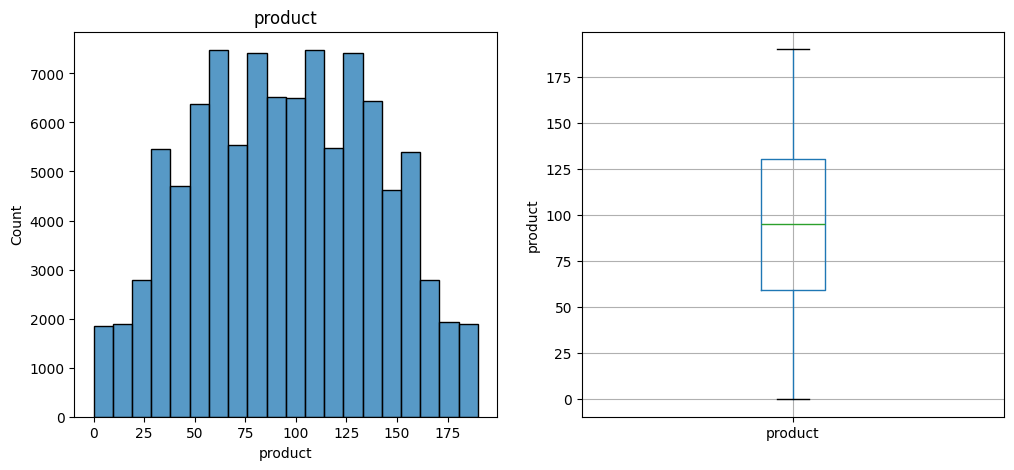

In [ ]:
for name, df in dfs_dict.items():
    print('*'*10,'Name:', name, '*'*10, '\n')
    for col in df.columns:
        if col == 'id':
            continue
        else:
            num_to_scan(df, col)

#### Conclusions

Dataframe `df_geo_0`:

1. Column `f0` - has a three-peak distribution, no outliers were found outside the whisker range;
2. Column `f1` - also has a three-peak distribution, no outliers were found outside the whisker range;
3. Column `f2` - has a normal distribution, contains outliers outside the whisker range. This feature is important for determining the quality of oil, outliers are not supposed to be removed;
4. Column `product` - has a normal distribution, no outliers were found outside the whisker range.

Dataframe `df_geo_1`:

1. Column `f0` - has a two-peak distribution, a single outlier was found outside the whisker range;
2. Column `f1` - has a normal distribution, contains outliers outside the whisker range. This feature is important for determining the quality of oil, outliers are not expected to be removed;
3. Column `f2` - has a discrete nature. Analysis of the values ​​from the histogram and data loading showed that the indicators are grouped around 6 values, but are not integer. Presumably, they are a consequence of the specific equipment operation features.
4. Column `product` - has a discrete nature. Analysis of the values ​​from the histogram and data loading showed that the indicators are grouped around 6 values, but are not integer. Presumably, they are a consequence of the specific equipment operation features.

Dataframe `df_geo_2`:

1. Column `f0` - has a normal distribution, contains outliers outside the whisker range. This feature is important for determining the quality of oil, outliers are not expected to be removed;
2. Column `f1` - has a normal distribution, contains outliers outside the whisker range. This feature is important for determining the quality of oil, outliers are not expected to be removed;
3. Column `f2` - has a normal distribution, contains outliers beyond the whisker range. This feature is important for determining oil quality, outliers are not expected to be removed;
4. Column `product` - has a multi-peak distribution, outliers beyond the whisker range were not detected.

In general, it is clear that the features responsible for oil quality have different distributions in the data frames, indicating significant differences in oil quality depending on the region.

Oil reserves in the regions `df_geo_0` and `df_geo_2` have similar values. The distribution of values ​​in the region `df_geo_1` is significantly different.

### Correlational Analysis

Let's check the features for collinearity and multicollinearity:

************************* Name: df_geo_0 ************************* 



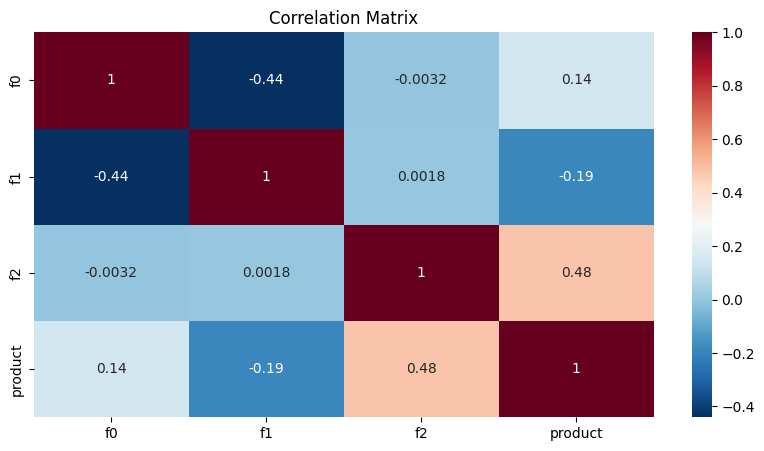

************************* Name: df_geo_1 ************************* 



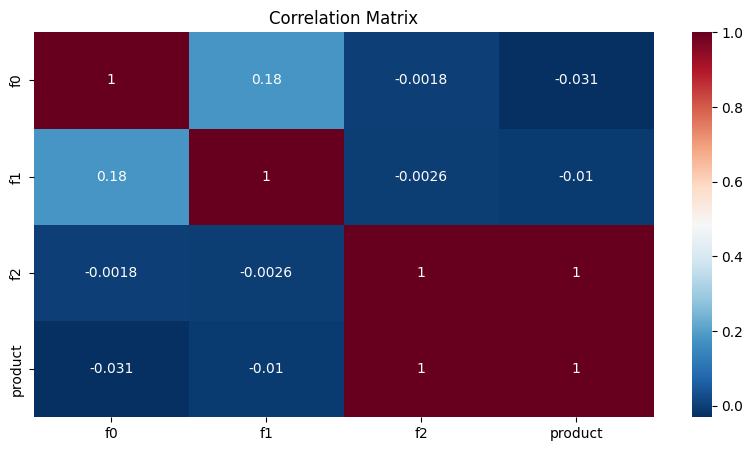

************************* Name: df_geo_2 ************************* 



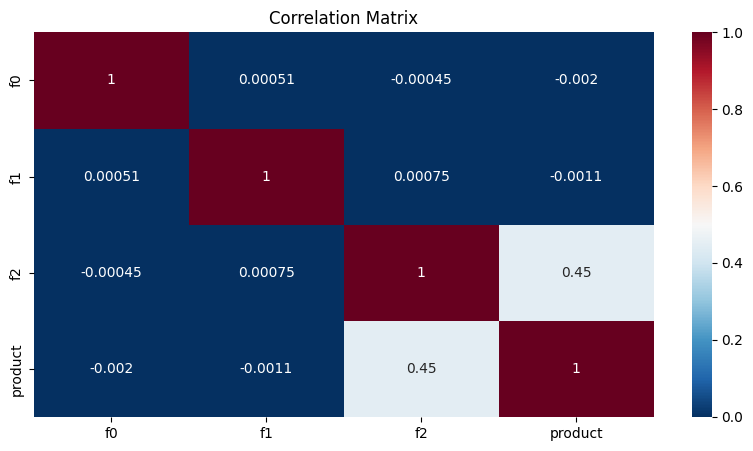

In [ ]:
for name, df in dfs_dict.items():
    print('*'*25,'Name:', name, '*'*25, '\n')
    df_corr = df.drop('id', axis=1)
    corr_matrix = df_corr.corr()

    plt.figure(figsize=(10, 5))
    sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r')
    plt.title('Correlation Matrix')
    plt.show();

#### Conclusions

Dataframe `df_geo_0`:

1. No multicollinearity (very high correlations (0.9 +)) among input features. The highest negative collinearity is found between features `f0` and `f1`, equal to -0.44.

2. The target feature `product` has a moderate correlation with the input feature `f2` - 0.48.

Dataframe `df_geo_1`:

1. No multicollinearity (very high correlations (0.9 +)) among input features.

2. The target feature `product` has a full correlation with the input feature `f2` - 1.00.

Dataframe `df_geo_2`:

1. No multicollinearity (very high correlations (0.9 +)) among input features.

2. The target feature `product` has a moderate correlation with the input feature `f2` - 0.45.

In general, it can be noted that the correlation in the regions of the data frames `df_geo_0` and `df_geo_2` have similar values.
The dependence of the target feature on the input features in the region of the data frame `df_geo_1` differs significantly and, given the discreteness of the feature `f2`, indicates the specifics of the equipment used in the region when determining the values ​​of the feature `f2` and, as a consequence, the similar discreteness of the values ​​of the target feature `product`.

## Model Training and Validation

We will train and test models for each region to predict the volume of reserves in new wells.

### Data Preparation

Let's create a function to prepare the data:

In [ ]:
#function for data preparation
def prepare_data(df):
    X = df.drop(['id', 'product'], axis=1)
    y = df['product']

    X_train, X_test, y_train, y_test = train_test_split(
        X,
        y,
        test_size=TEST_SIZE,
        random_state=RANDOM_STATE
    )
    num_col_names = X_train.select_dtypes(include='number').columns.tolist()

    return X_train, X_test, y_train, y_test, num_col_names

Let's check the sizes and dimensions for each region and define the num_col_names variable for further use in the pipeline:

In [ ]:
for name, df in dfs_dict.items():
    X_train, X_test, y_train, y_test, num_col_names = prepare_data(df)
    print(f'Training and test sample sizes for {name}:\
{X_train.shape, X_test.shape, y_train.shape, y_test.shape} \n')

Training and test sample sizes for df_geo_0:((74992, 3), (24998, 3), (74992,), (24998,)) 

Training and test sample sizes for df_geo_1:((74997, 3), (24999, 3), (74997,), (24999,)) 

Training and test sample sizes for df_geo_2:((74997, 3), (24999, 3), (74997,), (24999,)) 



### Training Models

Let's create a pipeline for training models:

In [ ]:
data_preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_col_names)
],
    remainder='passthrough'
)

In [ ]:
pipe_final = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', LinearRegression())
    ]
)

Let's create a dictionary of models with hyperparameters to find the best model using the GridSearchCV method. According to the problem statement, only the linear regression model is suitable.

In [ ]:
param_grid = [
    {
        'models': [LinearRegression()],
        'preprocessor__num': [StandardScaler(), MinMaxScaler()]
    },
]

Let's create an automatic search for the best model using the GridSearchCV method with the RMSE metric. To search for the best metric, let's create our own with the parameter `greater_is_better=False`.

In [ ]:
rmse_scorer = make_scorer(root_mean_squared_error, greater_is_better=False)

In [ ]:
grid_search = GridSearchCV(
    pipe_final,
    param_grid=param_grid,
    cv=5,
    scoring=rmse_scorer,
    n_jobs=-1
)

In [ ]:
dfs_product_dict = {}

for name, df in dfs_dict.items():
    print('*'*35,'Name:', name, '*'*35, '\n')
    X_train, X_test, y_train, y_test, num_col_names = prepare_data(df)
    grid_search.fit(X_train, y_train)
    print(f'RMSE on training set for region {name}: {grid_search.best_score_:.2f}')
    y_test_pred = grid_search.best_estimator_.predict(X_test)
    print(f'Average stock of predicted raw materials for the region df_geo_0: {y_test_pred.mean():.2f}')
    print(f'RMSE on validation set for region df_geo_0: {root_mean_squared_error(y_test, y_test_pred):.2f} \n\n\n')
    product_true_pred = y_test.to_frame()
    product_true_pred['product_pred'] = y_test_pred
    dfs_product_dict[str(name)] = product_true_pred

print('-'*85)
print(f'Best Model: {grid_search.best_estimator_}')
print('-'*85)

*********************************** Name: df_geo_0 *********************************** 

RMSE on training set for region df_geo_0: -37.70
Average stock of predicted raw materials for the region df_geo_0: 92.61
RMSE on validation set for region df_geo_0: 37.69 



*********************************** Name: df_geo_1 *********************************** 

RMSE on training set for region df_geo_1: -0.89
Average stock of predicted raw materials for the region df_geo_0: 68.58
RMSE on validation set for region df_geo_0: 0.89 



*********************************** Name: df_geo_2 *********************************** 

RMSE on training set for region df_geo_2: -40.05
Average stock of predicted raw materials for the region df_geo_0: 94.93
RMSE on validation set for region df_geo_0: 40.08 



-------------------------------------------------------------------------------------
Best Model: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                   

Let's display the first five values ​​of the obtained data frames with predictions and correct answers on the validation sample.

In [ ]:
for name, df in dfs_product_dict.items():
    print('*'*5,'Name:', name, '*'*5)
    display(dfs_product_dict.get(name, 'default value').head())
    print()

***** Name: df_geo_0 *****


,product,product_pred
33966,119.813252,127.486528
22854,133.296862,116.465831
19449,25.310435,66.041910
9733,65.422491,45.009390
7129,140.851476,124.535557



***** Name: df_geo_1 *****


,product,product_pred
33968,0.000000,1.745635
24612,134.766305,135.730891
42678,134.766305,133.539653
9732,30.132364,28.844517
7129,137.945408,138.037182



***** Name: df_geo_2 *****


,product,product_pred
33968,156.925842,111.540811
24612,31.245818,66.812289
42677,48.478519,70.406921
9732,34.079047,63.118690
7129,138.077543,141.162178


### Conclusions

- Regions df_geo_0 and df_geo_2 showed similar average stocks of the predicted raw materials. However, the model for the region df_geo_0 showed a lower RMSE error, which means its predictions are more accurate;
- In the region df_geo_1, the average orders of the predicted raw materials are 30% lower. The accuracy of the model's predictions is determined by the full correlation of the target feature with the input feature `f2` - 1.00.

## Preparing for profit calculation

### Sufficient volume of raw materials for break-even development of a new well

Let's save the key values ​​for calculating profit in variables:

In [ ]:
# budget for well development in the region in million rubles
BUDGET = 10_000

# income from each product unit in million rubles
BBL_1000 = 0.45

# number of wells studied in the region
OIL_WELL_AMOUNT_ALL = 500

# number of wells for development in the region
OIL_WELL_AMOUNT = 200

Let's calculate the sufficient volume of raw materials for the break-even development of a new well:

In [ ]:
break_even_point = BUDGET / OIL_WELL_AMOUNT / BBL_1000
print(f'Sufficient volume of raw materials for break-even development of a new well: {break_even_point:.2f}')

Sufficient volume of raw materials for break-even development of a new well: 111.11


#### Conclusions

The average reserve of the predicted raw material by region does not exceed the calculated sufficient volume for break-even development of a new well. This means that with random drilling of 200 wells, there is a high probability of incurring a loss.

### Profit Calculation Function

Let's write a function to calculate profit for selected wells and model predictions:

In [ ]:
def best_oil_well_revenue(df):
    revenue = df.sort_values(by='product_pred', ascending=False)['product'].head(OIL_WELL_AMOUNT).sum()*BBL_1000 - BUDGET
    return revenue

In [ ]:
for name, df in dfs_product_dict.items():
    print('*'*10,'Name:', name, '*'*10, '\n')
    revenue = best_oil_well_revenue(df)
    print(f'Profit from the 200 best wells for the region {name}: {revenue:.0f} million rubles \n')

********** Name: df_geo_0 ********** 

Profit from the 200 best wells for the region df_geo_0: 3469 million rubles 

********** Name: df_geo_1 ********** 

Profit from the 200 best wells for the region df_geo_1: 2415 million rubles 

********** Name: df_geo_2 ********** 

Profit from the 200 best wells for the region df_geo_2: 2397 million rubles 



#### Conclusions

By developing 200 wells with maximum prediction values, well development will pay for itself in each region.

## Calculation of profit and risks

Let's write a function to calculate profit and risks for each region using Bootstrap technique for 1000 samples.

In [ ]:
def bootstrap(df):
    state = np.random.RandomState(RANDOM_STATE)
    values = []
    for i in range(1000):
        product_subsample = df[['product', 'product_pred']].sample(n=OIL_WELL_AMOUNT_ALL, replace=True, random_state=state)
        revenue = best_oil_well_revenue(product_subsample)
        values.append(revenue)
    values = pd.Series(values)
    revenue_mean = values.mean()
    low = values.quantile(0.025)
    high = values.quantile(0.975)
    risk_of_loss = (values<0).mean()
    return revenue_mean, low, high, risk_of_loss

In [ ]:
for name, df in dfs_product_dict.items():
    print('*'*25,'Name:', name, '*'*25, '\n')
    revenue_mean, low, high, risk_of_loss = bootstrap(df)
    print(f'Average profit for the region {name} using Bootstrap technique: {revenue_mean:.0f} million rubles')
    print(f'95% confidence interval of profit for the region {name}: from {low:.0f} million rubles to {high:.0f} million rubles')
    print(f'Risk of losses in the region {name}: {risk_of_loss * 100:.1f} %')
    print()

************************* Name: df_geo_0 ************************* 

Average profit for the region df_geo_0 using Bootstrap technique: 404 million rubles
95% confidence interval of profit for the region df_geo_0: from -138 million rubles to 903 million rubles
Risk of losses in the region df_geo_0: 5.9 %

************************* Name: df_geo_1 ************************* 

Average profit for the region df_geo_1 using Bootstrap technique: 430 million rubles
95% confidence interval of profit for the region df_geo_1: from 43 million rubles to 847 million rubles
Risk of losses in the region df_geo_1: 1.6 %

************************* Name: df_geo_2 ************************* 

Average profit for the region df_geo_2 using Bootstrap technique: 384 million rubles
95% confidence interval of profit for the region df_geo_2: from -128 million rubles to 910 million rubles
Risk of losses in the region df_geo_2: 8.0 %



### Conclusions

Based on the profits and risks calculated by the Bootstrap technique for 1000 samples for each region, it can be concluded that it is advisable to develop wells in region **1 (df_geo_1)**. This region contains the highest average profit. The 95% confidence interval excludes the possibility of losses. The risk of losses is 1.6%, which is the minimum value of the three regions.

However, it is worth noting that as a result of the exploratory analysis of the data, a different nature of the `f2` features and the volume of reserves in the well was revealed from other regions. These values ​​are discrete and fully correlated, which allows the model to predict the volume of oil reserves in the well with a minimum error according to the RMSE metric. It is recommended to determine the nature of the obtained values ​​and, in case of detection of insufficiency or unreliability of the initial data, to conduct a repeated study.